In [2]:
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from  sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

In [3]:
banking = pd.read_csv('../linear_regression_case_study/SRC/banking.csv')
banking.head()

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
0,8.90,735-739,20000.0,20000.0,36.0
1,12.12,715-719,19200.0,19200.0,36.0
2,21.98,690-694,35000.0,35000.0,60.0
3,9.99,695-699,10000.0,9975.0,36.0
4,11.71,695-699,12000.0,12000.0,36.0


In [4]:
banking.info()
banking.describe(include='all')
banking.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   object 
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
dtypes: float64(4), object(1)
memory usage: 97.7+ KB


interest_rate                 0
fico_range                    0
amount_requested              0
amount_funded_by_investors    0
loan_length                   0
dtype: int64

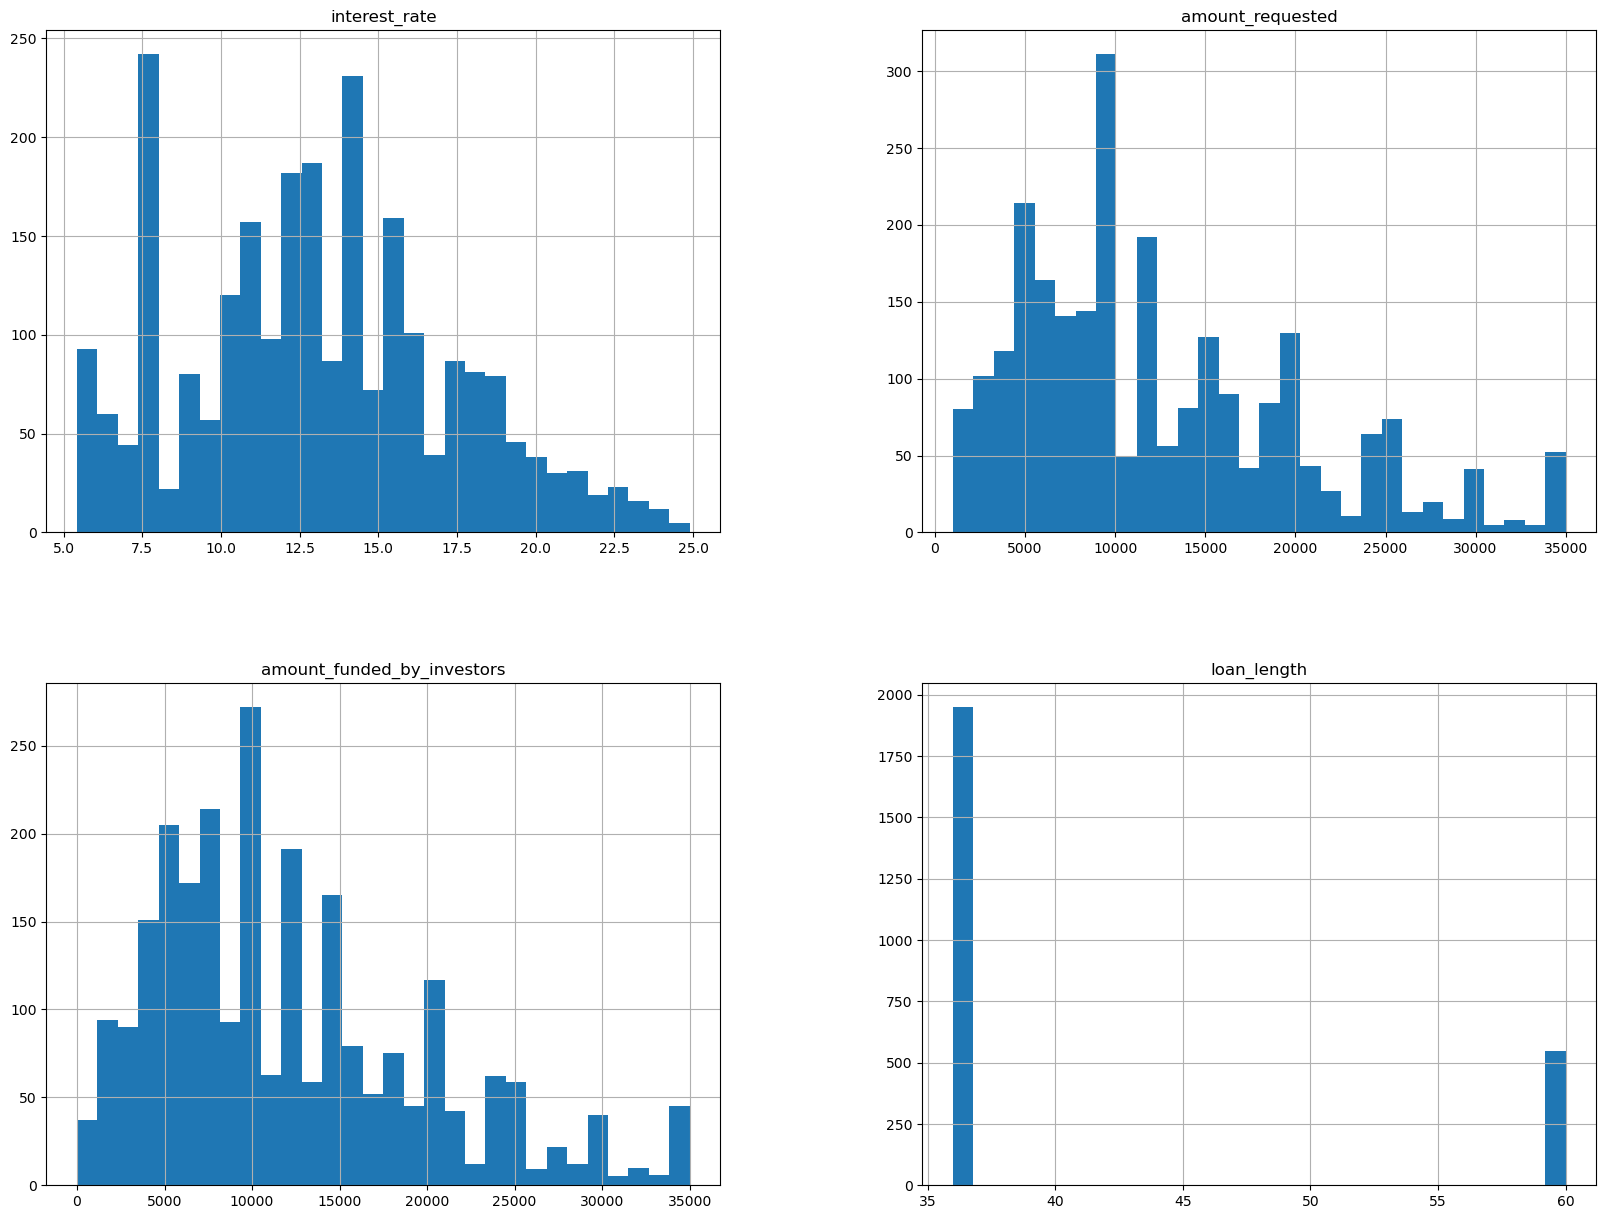

In [5]:
banking.hist(bins=30, figsize=(20,15))
plt.show()

From the histograms, we can observe the following:

- interest_rate: Most of the interest rates are between 10 and 15 (presumably percentage) .
- amount_requested and amount_funded_by_investors: These two are very similar, indicating that most of the requested amounts are funded. The distribution is right-skewed, with most of the loans being less than 20000.
- loan_length: There are two major categories in loan length, around 36 and 60.

<Axes: >

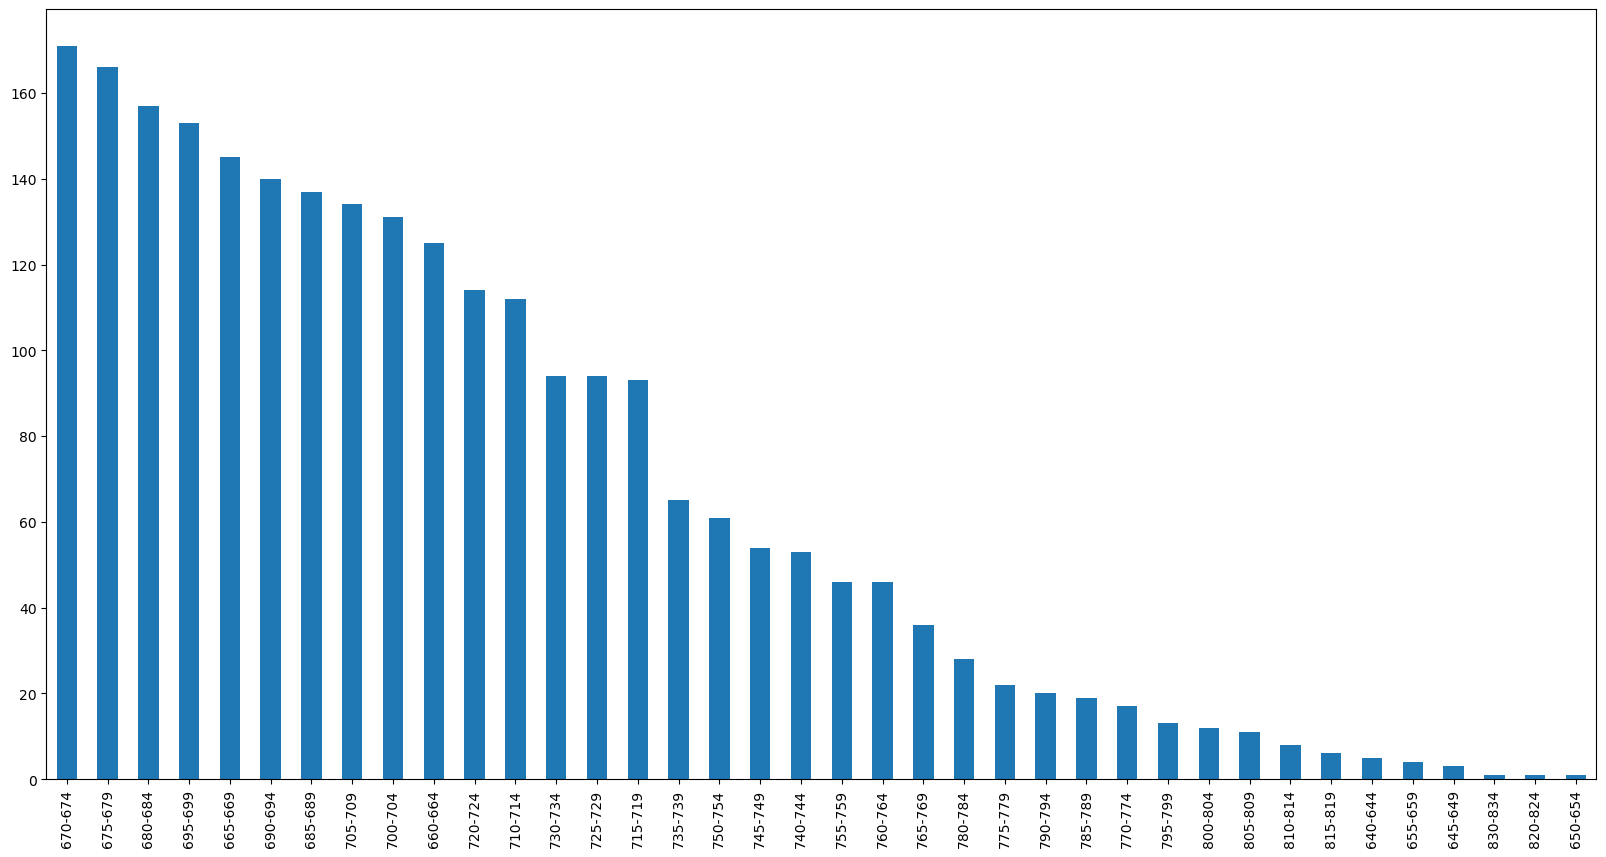

In [6]:
fico_counts = banking['fico_range'].value_counts()
fico_counts.plot(kind='bar', figsize=(20,10))

The fico_range column has many unique values, which makes the bar plot a bit cluttered. However, we can still see that some FICO ranges are more common than others.

C:\Users\austi\AppData\Local\Temp\ipykernel_23920\1209599206.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = banking.corr()


<Axes: >

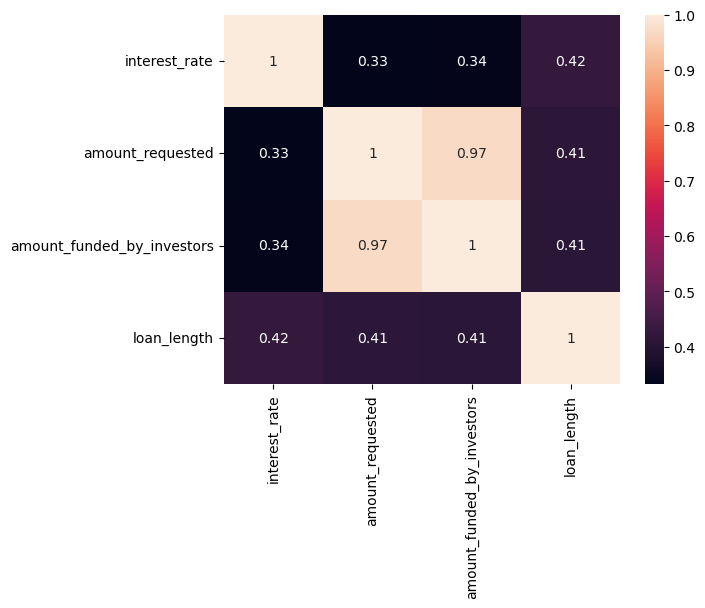

In [7]:
corr_matrix = banking.corr()
sns.heatmap(corr_matrix, annot=True)

For some reason, the fico_range column is not displaying. I need to fix that. 

In [8]:
# Convert fico_range to numerical by taking the average
banking['fico_average'] = banking['fico_range'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)
banking.drop('fico_range', axis=1, inplace=True)
banking.head()

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_average
0,8.90,20000.0,20000.0,36.0,737.0
1,12.12,19200.0,19200.0,36.0,717.0
2,21.98,35000.0,35000.0,60.0,692.0
3,9.99,10000.0,9975.0,36.0,697.0
4,11.71,12000.0,12000.0,36.0,697.0


<Axes: >

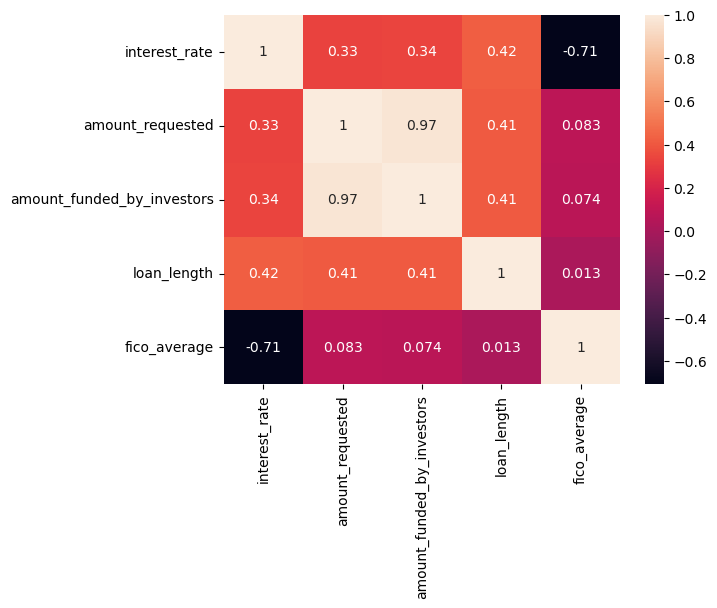

In [9]:
corr_matrix = banking.corr()
sns.heatmap(corr_matrix, annot=True)

From the correlation matrix, we can observe the following:

- interest_rate has a moderate negative correlation with fico_average, indicating that higher FICO scores tend to have lower interest rates.
- interest_rate has a moderate positive correlation with loan_length, indicating that longer loans tend to have higher interest rates.
- amount_requested and amount_funded_by_investors are highly correlated, which is expected as most of the requested amounts are funded.

### Austin's suggested way ahead:
y (target) should be the interest_rate column (duh) compared against all of the other columns (features). We should build a linear regression model, first by splitting the data into training and test sets, then by analyzed the effect of the individual cooeficients to detect any issues with the models.  